In [1]:
import pandas as pd
import numpy as np 
import itertools as it
% matplotlib inline
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [2]:
import pickle
import time

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## Loading the data

In [4]:
model = KeyedVectors.load_word2vec_format('./Goog/GoogleNews-vectors-negative300.bin', binary=True)

In [5]:
clean_final = pd.read_csv("./total_news/clean_final_news.csv", encoding = "utf8", index_col = 0)

In [6]:
clean_final.head()

,author,published,text,domain_rank,site_url,spam_score,title,response,length
0,SAM TANENHAUS,2016-11-20T03:51:00.000+02:00,Privacy Policy Eisenhowers two terms bore this...,98.0,nytimes.com,0.000,Opinion: Donald Trump’s Art of the New Deal?,Not fake,949
1,NaN,2016-11-20T00:52:00.000+02:00,Can Trump Save Their Jobs? by Nelson D. Sc...,98.0,nytimes.com,0.000,Carrier Workers for Trump,Not fake,372
2,Kathleen Elkins,2016-11-20T06:18:00.000+02:00,"Tuesday, 18 Oct 2016 | 10:25 AM ET CNBC.com Ed...",767.0,cnbc.com,0.008,Tennis star Caroline Wozniacki shares the mone...,Not fake,386
3,JEFF SOMMER,2016-11-20T00:04:00.000+02:00,Continue reading the main story Yet it is poss...,98.0,nytimes.com,0.000,Strategies: It’s Not Just the White House. Cha...,Not fake,1005
4,James Rufus Koren,2016-11-20T02:42:00.000+02:00,Wells Fargo hit with new sanctions following f...,609.0,latimes.com,0.264,Wells Fargo hit with new sanctions following f...,Not fake,809


In [12]:
fileObject = open('./lem_texts/uni_text.sav','rb')  
uni_lem_comb2 = pickle.load(fileObject)  ## load unigram

In [11]:
fileObject = open('./lem_texts/tri_text.sav','rb')  
tri_lem_comb2 = pickle.load(fileObject)  ## load trigram

In [13]:
uni_lem = pd.Series([x for x in uni_lem_comb2])
uni_lem[0:10]

0    privacy policy eisenhowers term bear instead u...
1    trump save jobs nelson d. schwartz nov. look w...
2    tuesday oct 10:25 et cnbc.com eduardo munoz al...
3    continue read main story possible election rem...
4    wells fargo hit new sanction follow fake accou...
5    privacy policy liberal society depend illibera...
6    let friend social network know read facebook e...
7    privacy policy lot people tonight feel like lo...
8    young barber brazil cutting away traditional b...
9    passenger train go track near northern indian ...
dtype: object

In [14]:
tri_lem = pd.Series([x for x in tri_lem_comb2])
tri_lem[0:10]

0    privacy_policy eisenhowers term bear instead u...
1    trump save jobs nelson d. schwartz nov. look w...
2    tuesday oct 10:25 et cnbc.com eduardo_munoz_al...
3    continue_read_main_story possible election rem...
4    wells_fargo hit new sanction follow fake_accou...
5    privacy_policy liberal society depend illibera...
6    let_friend_social_network know_read_facebook e...
7    privacy_policy lot_people tonight feel_like lo...
8    young barber brazil cutting away traditional b...
9    passenger_train go track near northern indian ...
dtype: object

## Converting the text into vectors

In [7]:
def infer_vector(text):
    text = text.split()
    vector = []
    for i in text:
        try:
            vector.append(model.word_vec(i))
        except:
            pass
    return list(np.mean(vector, axis=0))

test = clean_final.iloc[:10, :]
test.text = test.text.apply(infer_vector)
test.head()

/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,author,published,text,domain_rank,site_url,spam_score,title,response,length
0,SAM TANENHAUS,2016-11-20T03:51:00.000+02:00,"[0.0410616, 0.0443374, 0.0329776, 0.0611348, -...",98.0,nytimes.com,0.000,Opinion: Donald Trump’s Art of the New Deal?,Not fake,949
1,NaN,2016-11-20T00:52:00.000+02:00,"[0.0345326, 0.0364513, 0.0196588, 0.0763706, -...",98.0,nytimes.com,0.000,Carrier Workers for Trump,Not fake,372
2,Kathleen Elkins,2016-11-20T06:18:00.000+02:00,"[0.0474658, 0.00713334, 0.0312889, 0.0871276, ...",767.0,cnbc.com,0.008,Tennis star Caroline Wozniacki shares the mone...,Not fake,386
3,JEFF SOMMER,2016-11-20T00:04:00.000+02:00,"[0.0167984, 0.0344597, 0.0157176, 0.0664391, -...",98.0,nytimes.com,0.000,Strategies: It’s Not Just the White House. Cha...,Not fake,1005
4,James Rufus Koren,2016-11-20T02:42:00.000+02:00,"[-0.000221085, 0.0416317, 0.03043, 0.0444352, ...",609.0,latimes.com,0.264,Wells Fargo hit with new sanctions following f...,Not fake,809


In [15]:
%%time
vec_text = tri_lem.apply(infer_vector)
type(vec_text)

CPU times: user 21.9 s, sys: 484 ms, total: 22.4 s
Wall time: 22.4 s


In [16]:
vec_text[0:2]

0    [0.0335845, 0.0401085, 0.00729215, 0.112954, -...
1    [0.0324782, 0.00438509, -0.00248873, 0.1, -0.0...
dtype: object

In [17]:
%%time
vec_text = pd.DataFrame(list(map(lambda x: list(x), vec_text)))

CPU times: user 3.07 s, sys: 143 ms, total: 3.21 s
Wall time: 3.22 s


In [18]:
vec_text.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.033585,0.040108,0.007292,0.112954,-0.060914,-0.029191,0.048299,-0.058155,0.084398,0.059573,...,-0.068472,0.014620,-0.037333,-0.016348,-0.042939,-0.021002,0.017126,-0.048978,0.026031,-0.012229
1,0.032478,0.004385,-0.002489,0.100000,-0.071105,0.017676,0.060257,-0.050939,0.085788,0.046210,...,-0.041618,0.035648,-0.075665,0.011646,-0.007537,-0.012843,0.009767,-0.057980,0.025834,-0.028797
2,0.025310,0.012568,-0.010649,0.128698,-0.019919,0.007436,0.079936,-0.088572,0.069966,0.069574,...,-0.024976,0.074644,-0.064599,-0.001808,-0.013263,-0.095344,0.019082,-0.031374,0.001696,-0.029502
3,0.014668,0.020092,-0.030602,0.084360,-0.075278,-0.041485,0.052998,-0.080511,0.135734,0.066690,...,-0.075238,0.038700,-0.017733,-0.010239,-0.012920,-0.022788,-0.006968,0.010951,0.034321,-0.001688
4,-0.042439,-0.012939,0.006611,0.042099,-0.026948,-0.040657,0.047994,-0.022462,0.121271,0.019877,...,-0.023605,0.059983,-0.021047,0.013978,-0.017887,-0.008069,-0.001654,-0.020538,0.010296,-0.045819


## Prepping for Model runs

In [20]:
clean_final["binary_response"] = np.where(clean_final["response"] == "Not fake", 0, 1)

In [21]:
y_response = clean_final.binary_response.values

In [22]:
def evaluate_model(clf, actual, predicted):
    report = metrics.classification_report(actual, predicted, target_names = ["0", "1"])
    matrix = confusion_matrix(actual, predicted)
    train_loss = metrics.log_loss(y_train, clf.predict_proba(x_train))
    test_loss = metrics.log_loss(y_test, clf.predict_proba(x_test))
    
    print("Train score:", train_loss)
    print("Test score:", test_loss)
    print("Confusion Matrix\n", matrix)
    print("Classification Report:\n", report)
    
    return test_loss

In [23]:
x_train, x_test, y_train, y_test = train_test_split(vec_text, y_response, test_size = 0.2, stratify = y_response)

In [24]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
15337,0.024139,0.057428,-0.023096,0.060758,-0.014065,0.032443,0.026156,-0.141791,0.051922,0.036331,...,-0.015007,0.044455,-0.078512,-0.016917,-0.018819,-0.016878,0.000404,-0.074444,-0.000286,-0.008021
29853,0.000975,0.016791,0.037214,0.062590,-0.091887,-0.025060,0.055991,-0.078305,0.093893,0.015768,...,-0.041552,0.047071,-0.040111,0.015825,-0.058839,-0.029513,-0.075047,-0.030003,0.018380,0.062647
32806,-0.008659,0.020251,0.025705,0.088454,-0.082573,0.021149,0.067191,-0.093069,0.101118,0.061572,...,-0.033587,0.064462,-0.071282,-0.010957,-0.030271,-0.046133,-0.030366,-0.058680,0.044195,-0.014252
12786,0.008573,0.011314,0.025442,0.048172,-0.058044,-0.035242,0.064641,-0.052096,0.067983,0.049642,...,-0.026455,0.009235,-0.064152,0.017997,-0.013278,0.004693,-0.030965,-0.074453,0.044297,-0.012515
17931,0.018335,0.028327,0.029542,0.103806,-0.065309,-0.027456,0.022689,-0.069632,0.101524,0.053804,...,0.018608,0.019419,-0.056924,-0.030011,-0.031485,-0.095155,-0.015156,-0.064136,0.012906,0.011980


In [ ]:
# mean_w2v = MeanEmbeddingVectorizer(w2v).fit(x_train, y_train)

In [ ]:
# m = mean_w2v.transform(x_train)

In [ ]:
# m.shape

## Logistic Regression

In [25]:
lr = LogisticRegression()

In [26]:
%%time
lr.fit(x_train, y_train)

CPU times: user 1.64 s, sys: 59.5 ms, total: 1.7 s
Wall time: 1.71 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
lr_parameters = {#'tfidf__max_df': (0.75, 0.80, 0.85, 0.90, 0.95, 1.0),\
              #'tfidf__min_df': (0.001,0.01,0.1),\
               'penalty': ('l1','l2'),\
               'C': (0.01, 0.1, 1),\
               'class_weight': (None, 'balanced')}

In [28]:
# Establish grid search instance
wv_lr = GridSearchCV(lr, lr_parameters, n_jobs=-1, scoring = 'f1')

In [29]:
%%time
wv_lr = wv_lr.fit(x_train, y_train)

/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


CPU times: user 2min 23s, sys: 706 ms, total: 2min 24s
Wall time: 4min 43s


In [30]:
wv_lr.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l1'}

In [31]:
lr_predicted = wv_lr.predict(x_test)

In [32]:
%%time
# Get more detailed performance metrics
evaluate_model(wv_lr, y_test, lr_predicted)

Train score: 0.376870603259
Test score: 0.381752578936
Confusion Matrix
 [[3935  780]
 [ 353 1855]]
Classification Report:
              precision    recall  f1-score   support

          0       0.92      0.83      0.87      4715
          1       0.70      0.84      0.77      2208

avg / total       0.85      0.84      0.84      6923

CPU times: user 32.4 ms, sys: 5.31 ms, total: 37.7 ms
Wall time: 30.5 ms


0.38175257893598102

In [33]:
train_loss = metrics.roc_auc_score(y_train, wv_lr.predict(x_train))
test_loss = metrics.roc_auc_score(y_test, wv_lr.predict(x_test))
print("Train score:", train_loss)
print("Test score:", test_loss)

Train score: 0.83463796266
Test score: 0.837348665606


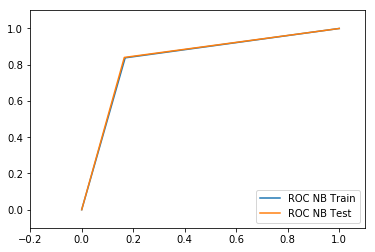

In [35]:
import sklearn
A=sklearn.metrics.roc_curve(y_train,wv_lr.predict(x_train),pos_label=1)
B=sklearn.metrics.roc_curve(y_test,wv_lr.predict(x_test),pos_label=1)

plt.plot(A[0],A[1],label='ROC NB Train')
plt.plot(B[0],B[1],label='ROC NB Test')
plt.xlim((-0.2,1.1))
plt.ylim((-0.1,1.1))
plt.legend(loc=4)

In [54]:
# saving lr model
filename = 'wv_lr_model.sav'
pickle.dump(wv_lr, open(filename, 'wb'))

## SVM

In [36]:
from sklearn.svm import SVC
svm = SVC()

In [37]:
%%time
svm.fit(x_train, y_train)

CPU times: user 3min 4s, sys: 991 ms, total: 3min 5s
Wall time: 3min 6s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
svm_parameters = {'C': (1, 10, 100, 1000),\
                 'degree': (1, 2, 3),\
                 'class_weight': (None, 'balanced')}

In [45]:
wv_svm = GridSearchCV(svm, svm_parameters, n_jobs=-1, scoring='f1')

In [46]:
%%time
wv_svm = wv_svm.fit(x_train, y_train)

/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mikeghoul/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/m

CPU times: user 3min 1s, sys: 2.1 s, total: 3min 3s
Wall time: 1h 9min 18s


In [47]:
wv_svm.best_params_

{'C': 1000, 'class_weight': 'balanced', 'degree': 1}

In [48]:
svm_predicted = wv_svm.predict(x_test)

In [50]:
# can't feed in proba for svm, log loss requires probability
matrix = confusion_matrix(y_test, svm_predicted)
report = metrics.classification_report(y_test, svm_predicted, target_names = ['0', '1'])
print('Confusion Matrix:\n', matrix)
print('Classification report:\n', report)

Confusion Matrix:
 [[3956  759]
 [ 346 1862]]
Classification report:
              precision    recall  f1-score   support

          0       0.92      0.84      0.88      4715
          1       0.71      0.84      0.77      2208

avg / total       0.85      0.84      0.84      6923



In [51]:
train_loss = metrics.roc_auc_score(y_train, wv_svm.predict(x_train))
test_loss = metrics.roc_auc_score(y_test, wv_svm.predict(x_test))
print("Train score:", train_loss)
print("Test score:", test_loss)

Train score: 0.842234437545
Test score: 0.841160745847


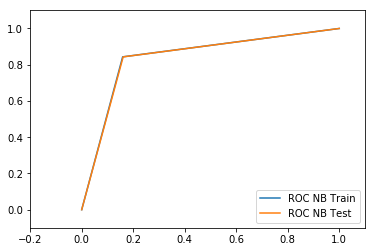

In [52]:
A=sklearn.metrics.roc_curve(y_train,wv_svm.predict(x_train),pos_label=1)
B=sklearn.metrics.roc_curve(y_test,wv_svm.predict(x_test),pos_label=1)

plt.plot(A[0],A[1],label='ROC NB Train')
plt.plot(B[0],B[1],label='ROC NB Test')
plt.xlim((-0.2,1.1))
plt.ylim((-0.1,1.1))
plt.legend(loc=4)

In [53]:
# saving svm model
filename = 'wv_svm_model.sav'
pickle.dump(wv_svm, open(filename, 'wb'))

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [56]:
%%time
rf.fit(x_train, y_train)

CPU times: user 4.83 s, sys: 39.9 ms, total: 4.87 s
Wall time: 4.9 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [57]:
rf_parameters = {'n_estimators': (50, 100, 200),\
               'criterion': ('gini', 'entropy'),\
               'class_weight': (None, 'balanced'),\
               'min_samples_split': (10,20,30)}

In [58]:
wv_rf = GridSearchCV(rf, rf_parameters, n_jobs=-1, scoring='f1')

In [59]:
%%time
wv_rf = wv_rf.fit(x_train, y_train)

CPU times: user 2min 12s, sys: 3.18 s, total: 2min 15s
Wall time: 16min 57s


In [60]:
wv_rf.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'min_samples_split': 30,
 'n_estimators': 200}

In [61]:
%%time
rf_predicted = wv_rf.predict(x_test)

CPU times: user 369 ms, sys: 11.3 ms, total: 381 ms
Wall time: 381 ms


In [62]:
%%time
# Get more detailed performance metrics
evaluate_model(wv_rf, y_test, rf_predicted)

Train score: 0.255530255637
Test score: 0.399167009967
Confusion Matrix
 [[4318  397]
 [ 632 1576]]
Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.92      0.89      4715
          1       0.80      0.71      0.75      2208

avg / total       0.85      0.85      0.85      6923

CPU times: user 1.89 s, sys: 68.2 ms, total: 1.95 s
Wall time: 1.97 s


0.39916700996666682

In [63]:
%%time
train_loss = metrics.roc_auc_score(y_train, wv_svm.predict(x_train))
test_loss = metrics.roc_auc_score(y_test, wv_svm.predict(x_test))
print("Train score:", train_loss)
print("Test score:", test_loss)

Train score: 0.842234437545
Test score: 0.841160745847
CPU times: user 2min 7s, sys: 269 ms, total: 2min 8s
Wall time: 2min 8s


CPU times: user 2min 7s, sys: 288 ms, total: 2min 8s
Wall time: 2min 8s


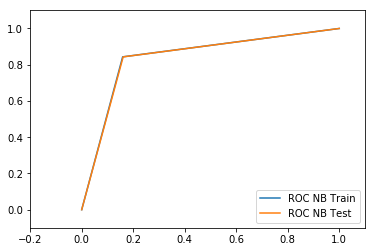

In [64]:
%%time
A=sklearn.metrics.roc_curve(y_train,wv_svm.predict(x_train),pos_label=1)
B=sklearn.metrics.roc_curve(y_test,wv_svm.predict(x_test),pos_label=1)

plt.plot(A[0],A[1],label='ROC NB Train')
plt.plot(B[0],B[1],label='ROC NB Test')
plt.xlim((-0.2,1.1))
plt.ylim((-0.1,1.1))
plt.legend(loc=4)

In [65]:
# saving svm model
filename = 'wv_rf_model.sav'
pickle.dump(wv_rf, open(filename, 'wb'))